# Load Preprocessed Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../../cleaned-data-kbk.csv', index_col=0)
df.head()

,judul,abstrak,kbk,judul_tokens,abstrak_tokens
0,pengembangan sistem pendukung keputusan untuk ...,sistem pendukung keputusan spk merupakan suatu...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang sistem dukung putus tentu dosen bimbin...,sistem dukung putus spk sistem milik kemampuan...
1,hubungan efikasi diri dengan kesiapan kerja lu...,pandemi covid 19 yang melanda dunia terutama i...,Ketenegakerjaan Teknologi dan Kejuruan,hubung efikasi kesiap kerja lulus smk negeri k...,pandemi covid 19 landa dunia indonesia 2020 da...
2,alat bantu penyandang tuetra berbasis deteksi ...,tujuan dilakukannya penelitian ini untuk memba...,Biomedic and Intelligent Assistive Technology ...,alat bantu sandang tuetra bas deteksi objek re...,tuju laku teliti bantu sandang tuetra gerak ma...
3,analisis thermovisi penghantar akibat transmis...,gardu induk waru merupakan sub transmisi listr...,Intelligent Power Electronics and Smart Grid (...,analisis thermovisi hantar akibat transmission...,gardu induk waru sub transmisi listrik kota si...
4,pengembangan modulberbasis production based ed...,mata pelajaran dasar desain grafis merupakan m...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang modulberbasis production based educati...,mata ajar dasar desain grafis mata ajar wajib ...


# Split Data

In [2]:
from sklearn.model_selection import train_test_split

X = df['abstrak_tokens']
y = df['kbk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(884, 8704)

In [4]:
terms = vectorizer.get_feature_names()

sums = X_train_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

              term        rank
575           ajar  110.100357
7319         siswa   54.497985
7851        teliti   39.774574
3847       kembang   34.852122
4775         media   34.536428
...            ...         ...
8443         venti    0.010419
83             160    0.010419
4733  mathematical    0.010419
80            15ce    0.010419
52            1288    0.010419

[8704 rows x 2 columns]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



# Oversampling: SMOTE

In [5]:
y_train.value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Strategi Pembelajaran Teknologi dan Kejuruan                                     147
Kurikulum Pendidikan Teknologi dan Kejuruan                                       72
Intelligent Power and Advanced energy System (IPAES)                              68
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)       66
Intelligent Power Electronics and Smart Grid (IPESG)                              64
Ketenegakerjaan Teknologi dan Kejuruan                                            54
Game Technology and Machine Learning Applications                                 53
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                      47
Telematics loT System and Devices                                                 44
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                         41
Biomedic and Intelligent Assistive Technology (TAT)              

In [6]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Game Technology and Machine Learning Applications                                194
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                        194
Strategi Pembelajaran Teknologi dan Kejuruan                                     194
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)      194
Biomedic and Intelligent Assistive Technology (TAT)                              194
Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Intelligent Power Electronics and Smart Grid (IPESG)                             194
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                     194
Sistem Dinamis, Kendali, dan Robotika (Dynamic Systems, Control and Robotics)    194
Kurikulum Pendidikan Teknologi dan Kejuruan                                      194
Intelligent Power and Advanced energy System (IPAES)                             194
Ketenegakerjaan Teknologi dan Kejuruan                           

# Training Model

## GridSearchCV

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[10, 20, 30, None]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='roc_auc_ovr', cv=10, verbose=3)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .....criterion=gini, max_depth=10;, score=0.844 total time=   0.3s
[CV 2/10] END .....criterion=gini, max_depth=10;, score=0.869 total time=   0.3s
[CV 3/10] END .....criterion=gini, max_depth=10;, score=0.901 total time=   0.3s
[CV 4/10] END .....criterion=gini, max_depth=10;, score=0.921 total time=   0.3s
[CV 5/10] END .....criterion=gini, max_depth=10;, score=0.954 total time=   0.3s
[CV 6/10] END .....criterion=gini, max_depth=10;, score=0.942 total time=   0.4s
[CV 7/10] END .....criterion=gini, max_depth=10;, score=0.947 total time=   0.3s
[CV 8/10] END .....criterion=gini, max_depth=10;, score=0.938 total time=   0.3s
[CV 9/10] END .....criterion=gini, max_depth=10;, score=0.938 total time=   0.4s
[CV 10/10] END ....criterion=gini, max_depth=10;, score=0.934 total time=   0.4s
[CV 1/10] END .....criterion=gini, max_depth=20;, score=0.834 total time=   0.5s
[CV 2/10] END .....criterion=gini, max_depth=2

[CV 2/10] END .criterion=log_loss, max_depth=30;, score=0.825 total time=   0.8s
[CV 3/10] END .criterion=log_loss, max_depth=30;, score=0.859 total time=   0.8s
[CV 4/10] END .criterion=log_loss, max_depth=30;, score=0.899 total time=   0.8s
[CV 5/10] END .criterion=log_loss, max_depth=30;, score=0.933 total time=   0.8s
[CV 6/10] END .criterion=log_loss, max_depth=30;, score=0.940 total time=   0.8s
[CV 7/10] END .criterion=log_loss, max_depth=30;, score=0.892 total time=   0.8s
[CV 8/10] END .criterion=log_loss, max_depth=30;, score=0.951 total time=   0.8s
[CV 9/10] END .criterion=log_loss, max_depth=30;, score=0.931 total time=   0.8s
[CV 10/10] END criterion=log_loss, max_depth=30;, score=0.940 total time=   0.8s
[CV 1/10] END criterion=log_loss, max_depth=None;, score=0.799 total time=   0.8s
[CV 2/10] END criterion=log_loss, max_depth=None;, score=0.833 total time=   0.8s
[CV 3/10] END criterion=log_loss, max_depth=None;, score=0.861 total time=   0.8s
[CV 4/10] END criterion=l

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, None]},
             scoring='roc_auc_ovr', verbose=3)

In [8]:
# Tabel hasil GridSearchCV
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.441999,0.031492,0.006459,0.000470,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.844195,0.869400,0.901295,0.920874,0.954256,0.941555,0.947353,0.938353,0.938224,0.934386,0.918989,0.034510,1
1,0.561940,0.019458,0.005998,0.000004,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.833700,0.857195,0.862674,0.898476,0.944799,0.937118,0.933712,0.936534,0.933057,0.947772,0.908504,0.040164,4
2,0.587560,0.020314,0.006055,0.000655,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.820066,0.840176,0.851450,0.892645,0.950047,0.923874,0.937109,0.932701,0.933435,0.945863,0.902737,0.045877,5
3,0.580184,0.019181,0.005901,0.000538,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.809727,0.838088,0.856132,0.890455,0.950249,0.928048,0.926160,0.939600,0.937816,0.948254,0.902453,0.048229,6
4,0.807562,0.006552,0.006499,0.000502,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.851859,0.861925,0.888733,0.886972,0.933815,0.955816,0.917861,0.948999,0.941056,0.946516,0.913355,0.036206,3
5,0.900183,0.009836,0.005800,0.000401,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.818284,0.824857,0.849962,0.897123,0.928756,0.939691,0.903088,0.946272,0.928751,0.937205,0.897399,0.046403,9
6,0.899651,0.012497,0.005797,0.000400,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.811821,0.814420,0.854243,0.900997,0.926566,0.941896,0.900799,0.941894,0.930940,0.935320,0.895890,0.048422,12
7,0.911425,0.025951,0.005603,0.000492,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.809729,0.820376,0.864889,0.903187,0.926467,0.944186,0.905076,0.946069,0.930941,0.930839,0.898176,0.047337,8
8,0.807465,0.007365,0.006053,0.000346,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.843449,0.862329,0.886421,0.902482,0.929034,0.956154,0.929289,0.949029,0.938983,0.951578,0.914875,0.037461,2
9,0.896365,0.011850,0.005701,0.000458,log_loss,20,"{'criterion': 'log_loss', 'max_depth': 20}",0.811818,0.805969,0.862797,0.902984,0.922189,0.944069,0.899012,0.945967,0.930738,0.939394,0.896494,0.049933,11


In [9]:
# Peringkat Score Parameter hasil GridSearchCV
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("criterion")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
criterion,,,,
gini_10,"{'criterion': 'gini', 'max_depth': 10}",1,0.918989,0.034510
log_loss_10,"{'criterion': 'log_loss', 'max_depth': 10}",2,0.914875,0.037461
entropy_10,"{'criterion': 'entropy', 'max_depth': 10}",3,0.913355,0.036206
gini_20,"{'criterion': 'gini', 'max_depth': 20}",4,0.908504,0.040164
gini_30,"{'criterion': 'gini', 'max_depth': 30}",5,0.902737,0.045877
gini_None,"{'criterion': 'gini', 'max_depth': None}",6,0.902453,0.048229
log_loss_30,"{'criterion': 'log_loss', 'max_depth': 30}",7,0.898496,0.047059
entropy_None,"{'criterion': 'entropy', 'max_depth': None}",8,0.898176,0.047337
entropy_20,"{'criterion': 'entropy', 'max_depth': 20}",9,0.897399,0.046403


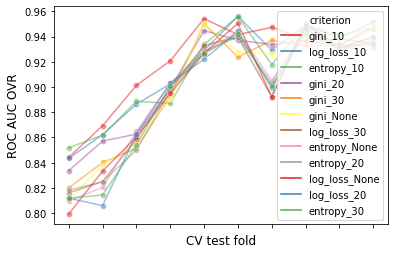

Correlation of models:
 criterion       gini_10  log_loss_10  entropy_10   gini_20   gini_30  \
criterion                                                              
gini_10        1.000000     0.924992    0.886546  0.951745  0.955597   
log_loss_10    0.924992     1.000000    0.982988  0.964821  0.940351   
entropy_10     0.886546     0.982988    1.000000  0.941067  0.915068   
gini_20        0.951745     0.964821    0.941067  1.000000  0.994316   
gini_30        0.955597     0.940351    0.915068  0.994316  1.000000   
gini_None      0.959185     0.960275    0.942848  0.994022  0.993408   
log_loss_30    0.907556     0.966592    0.960094  0.946790  0.929153   
entropy_None   0.940503     0.976404    0.956271  0.948341  0.931697   
entropy_20     0.920306     0.976465    0.962170  0.966430  0.950339   
log_loss_None  0.916288     0.976431    0.966465  0.941421  0.914529   
log_loss_20    0.914540     0.969622    0.952132  0.933815  0.917498   
entropy_30     0.927915     0.974411    

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose(),
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("ROC AUC OVR", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [19]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
model = clf.fit(X_train_resampled,y_train_resampled)

[Text(0.6560369318181818, 0.9545454545454546, 'X[575] <= 0.103\ngini = 0.923\nsamples = 2522\nvalue = [194, 194, 194, 194, 194, 194, 194, 194, 194, 194\n194, 194, 194]'),
 Text(0.4557765151515151, 0.8636363636363636, 'X[4470] <= 0.046\ngini = 0.909\nsamples = 1932\nvalue = [193, 93, 187, 194, 194, 178, 105, 41, 194, 193, 6\n160, 194]'),
 Text(0.2988636363636364, 0.7727272727272727, 'X[8633] <= 0.003\ngini = 0.895\nsamples = 1527\nvalue = [192, 65, 187, 49, 21, 163, 96, 34, 194, 193, 4\n160, 169]'),
 Text(0.20833333333333334, 0.6818181818181818, 'X[7128] <= 0.0\ngini = 0.876\nsamples = 1295\nvalue = [192, 36, 187, 49, 21, 26, 30, 34, 194, 193, 4\n160, 169]'),
 Text(0.12803030303030302, 0.5909090909090909, 'X[1859] <= 0.003\ngini = 0.857\nsamples = 890\nvalue = [61, 36, 177, 47, 16, 26, 28, 31, 194, 98, 4, 156\n16]'),
 Text(0.07727272727272727, 0.5, 'X[5546] <= 0.002\ngini = 0.875\nsamples = 720\nvalue = [61, 36, 116, 47, 16, 26, 28, 31, 85, 98, 4, 156\n16]'),
 Text(0.04242424242424243, 

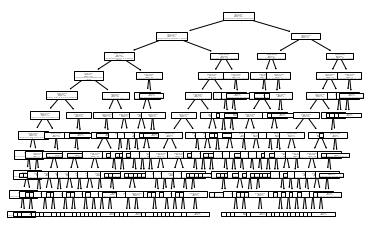

In [20]:
from sklearn import tree

tree.plot_tree(model) 

In [21]:
print('Decision Tree depth : ',model.get_depth())
print('Decision Tree n leaves : ',model.get_n_leaves())

Decision Tree depth :  10
Decision Tree n leaves :  138


# Evaluation

In [22]:
predictions = model.predict(X_test_tfidf)

In [23]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 0  0  8  1  1  0  1  0  0  0  0  0  2]
 [ 0  2  3  0  0  3  1  0  0  0  5  1  0]
 [ 1  1 14  0  0  0  0  3  7  1  0  0  0]
 [ 0  0  5 11  5  1  0  0  0  0  0  0  2]
 [ 0  0  2  7 12  0  0  0  0  1  0  0  0]
 [ 1  1 11  2  0 10  2  0  0  0  4  0  0]
 [ 0  4  2  0  0  3  5  4  0  0  4  1  0]
 [ 0  0  7  4  3  1  2 50  0  1 17  2  1]
 [ 0  1 22  0  1  0  0  0  8  1  0  0  0]
 [ 2  0  1  1  1  0  0  0  0  1  0  0  1]
 [ 0  3  3  0  0  1  8 13  0  0 34  0  0]
 [ 0  0  9  1  0  0  0  1  0  2  1  7  0]
 [ 0  1  3  2  1  0  0  0  0  0  1  0  6]]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


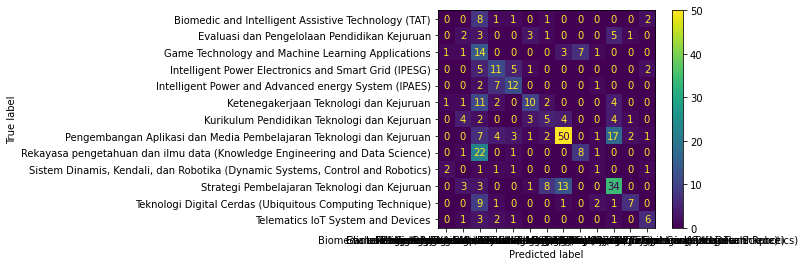

In [24]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test_tfidf, y_test) 
plt.show()

In [25]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                                                                               precision    recall  f1-score   support

                          Biomedic and Intelligent Assistive Technology (TAT)       0.00      0.00      0.00        13
                                 Evaluasi dan Pengelolaan Pendidikan Kejuruan       0.15      0.13      0.14        15
                            Game Technology and Machine Learning Applications       0.16      0.52      0.24        27
                         Intelligent Power Electronics and Smart Grid (IPESG)       0.38      0.46      0.42        24
                         Intelligent Power and Advanced energy System (IPAES)       0.50      0.55      0.52        22
                                       Ketenegakerjaan Teknologi dan Kejuruan       0.53      0.32      0.40        31
                                  Kurikulum Pendidikan Teknologi dan Kejuruan       0.26      0.22      0.24        23
          Pengembangan Aplikasi dan Media Pembe

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.42105263157894735
Precision score :  0.4785642708556099
Recall score :  0.42105263157894735
F1 score :  0.4311935829271544


# Export Model

In [27]:
from joblib import dump

dump(model, filename="model/dtc-model-abstrak.joblib")
dump(vectorizer, filename="model/vectorizer_model_abstrak.joblib")

['model/vectorizer_model_abstrak.joblib']

# Demo

In [28]:
title_input = input("Masukkan Abstrak Skripsi:\n")

'''
catatan input:
sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya diharapkan dapat memprediksi jenis kelompok bidang keahlian yang sesuai. data yang digunakan dalam penelitian sistem klasifikasi ini didapatkan dari database sisinta te-um berupa judul, abstrak, dan kbk yang terkait dengan tema penelitian pada skripsi dan tugas akhir tersebut.
'''

hasil = clf.predict_proba(vectorizer.transform([title_input]))

print(f"Abstrak Skripsi: {title_input}")

list1 = hasil.tolist()
cls = clf.classes_
list2 = cls.tolist()

d = {"Kelompok Bidang Keahlian":list2,"Probability":list1[0]}
df_proba = pd.DataFrame(d)

print(df_proba.sort_values("Probability", ascending=False))

Masukkan Abstrak Skripsi:
sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya diharapkan dapat memprediksi jenis kelompok bidang keahlian yang sesuai. data yang 